In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [3]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = r'C://Users//Facu//Downloads//zam'
combined_df = combine_csv_files(folder_path_2019)

In [17]:
combined_df = pd.read_csv(r"C:\Users\Facundo\Downloads\costa_de_uruguay_completo_filter95.csv")
combined_df["rh98"].describe()

count    11034.000000
mean        22.037966
std         26.012899
min          1.720000
25%          2.500000
50%          8.380000
75%         32.710000
max        101.740000
Name: rh98, dtype: float64

In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11034 entries, 0 to 11033
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  11034 non-null  int64  
 1   A00           11034 non-null  float64
 2   A01           11034 non-null  float64
 3   A02           11034 non-null  float64
 4   A03           11034 non-null  float64
 5   A04           11034 non-null  float64
 6   A05           11034 non-null  float64
 7   A06           11034 non-null  float64
 8   A07           11034 non-null  float64
 9   A08           11034 non-null  float64
 10  A09           11034 non-null  float64
 11  A10           11034 non-null  float64
 12  A11           11034 non-null  float64
 13  A12           11034 non-null  float64
 14  A13           11034 non-null  float64
 15  A14           11034 non-null  float64
 16  A15           11034 non-null  float64
 17  A16           11034 non-null  float64
 18  A17           11034 non-nu

In [19]:
# df_trees = combined_df[(combined_df["label"] == 1) & (combined_df["rh98"] > 2)]
df_trees = combined_df[(combined_df["rh98"] > 3) & (combined_df["rh98"] < 40)]
df_trees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5468 entries, 3 to 11033
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  5468 non-null   int64  
 1   A00           5468 non-null   float64
 2   A01           5468 non-null   float64
 3   A02           5468 non-null   float64
 4   A03           5468 non-null   float64
 5   A04           5468 non-null   float64
 6   A05           5468 non-null   float64
 7   A06           5468 non-null   float64
 8   A07           5468 non-null   float64
 9   A08           5468 non-null   float64
 10  A09           5468 non-null   float64
 11  A10           5468 non-null   float64
 12  A11           5468 non-null   float64
 13  A12           5468 non-null   float64
 14  A13           5468 non-null   float64
 15  A14           5468 non-null   float64
 16  A15           5468 non-null   float64
 17  A16           5468 non-null   float64
 18  A17           5468 non-null   fl

In [81]:
# # separar en dos subconjuntos
# df_low  = combined_df[combined_df["agbd"] <= 80]
# df_high = combined_df[combined_df["agbd"] > 80]

# # cantidad a tomar de cada grupo
# n_each = 10000   # mitad y mitad → 20k en total

# # samplear de cada grupo
# low_sample  = df_low.sample(n=n_each, random_state=42)
# high_sample = df_high.sample(n=n_each, random_state=42)

# # concatenar
# df_sample_balanced = pd.concat([low_sample, high_sample])

# print(df_sample_balanced.shape)
# print(df_sample_balanced["agbd"].describe())

In [15]:
# combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# # combined_df = combined_df.loc[combined_df['Slope'] <= 25]

# combined_df.info()

In [ ]:
# df_filtered = combined_df[combined_df['threshold'] < 50]
# df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141158 entries, 0 to 165977
Data columns (total 71 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   system:index  141158 non-null  int64  
 1   A00           141158 non-null  float64
 2   A01           141158 non-null  float64
 3   A02           141158 non-null  float64
 4   A03           141158 non-null  float64
 5   A04           141158 non-null  float64
 6   A05           141158 non-null  float64
 7   A06           141158 non-null  float64
 8   A07           141158 non-null  float64
 9   A08           141158 non-null  float64
 10  A09           141158 non-null  float64
 11  A10           141158 non-null  float64
 12  A11           141158 non-null  float64
 13  A12           141158 non-null  float64
 14  A13           141158 non-null  float64
 15  A14           141158 non-null  float64
 16  A15           141158 non-null  float64
 17  A16           141158 non-null  float64
 18  A17      

In [20]:
def remove_outliers(df, column_name):

    mean = df[column_name].mean()
    std_dev = df[column_name].std()    
    threshold = 3 * std_dev    
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))    
    df_filtered = df[condition]
    
    return df_filtered

df_filtered_remove = remove_outliers(df_trees, "rh98")
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5468 entries, 3 to 11033
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  5468 non-null   int64  
 1   A00           5468 non-null   float64
 2   A01           5468 non-null   float64
 3   A02           5468 non-null   float64
 4   A03           5468 non-null   float64
 5   A04           5468 non-null   float64
 6   A05           5468 non-null   float64
 7   A06           5468 non-null   float64
 8   A07           5468 non-null   float64
 9   A08           5468 non-null   float64
 10  A09           5468 non-null   float64
 11  A10           5468 non-null   float64
 12  A11           5468 non-null   float64
 13  A12           5468 non-null   float64
 14  A13           5468 non-null   float64
 15  A14           5468 non-null   float64
 16  A15           5468 non-null   float64
 17  A16           5468 non-null   float64
 18  A17           5468 non-null   fl

In [8]:
# df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
# df_nuevo.info()

In [21]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index']
df_modified = drop_columns(df_filtered_remove, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5468 entries, 3 to 11033
Data columns (total 69 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A00        5468 non-null   float64
 1   A01        5468 non-null   float64
 2   A02        5468 non-null   float64
 3   A03        5468 non-null   float64
 4   A04        5468 non-null   float64
 5   A05        5468 non-null   float64
 6   A06        5468 non-null   float64
 7   A07        5468 non-null   float64
 8   A08        5468 non-null   float64
 9   A09        5468 non-null   float64
 10  A10        5468 non-null   float64
 11  A11        5468 non-null   float64
 12  A12        5468 non-null   float64
 13  A13        5468 non-null   float64
 14  A14        5468 non-null   float64
 15  A15        5468 non-null   float64
 16  A16        5468 non-null   float64
 17  A17        5468 non-null   float64
 18  A18        5468 non-null   float64
 19  A19        5468 non-null   float64
 20  A20        5

In [22]:
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]
print(features)

['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'aspect', 'elevation', 'label', 'rh98', 'slope']


In [15]:
# feature_names =  ['CVI', 'EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NBR', 'NDBI', 'NDVI', 'NDWI', 'RVI', 'RVI_palsar', 'SAVI', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'agbd', 'aspect', 'elevation', 'label', 'slope']

# reduced = [
#     "EVI",
#     "SR_B4",
#     "slope",
#     "elevation",
#     "HH_minus_HV",
#     "SR_B3",
#     "aspect",
#     "SR_B6",
#     "HH_dB_Correlation",
#     "HV_dB_Correlation",
#     "HH_dB_Entropy",
#     "SR_B2",
#     "MNDWI",
#     "NDBI",
#     "HV_dB",
#     'agbd'
# ]

# radar = ['CH', 'B8','elevation', 'slope', 'NDBI', 'VV_minus_VH' , 'EVI',  'VH_Entropy', 'B11', 'aspect','VV_Correlation', 'VV', 'agbd']


# features = ['A39','A61','A01','A48','A36','A51','A30','A47','A50','A21','agbd']
# # # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# # feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']

# df_reduce = df_modified[features]
# df_reduce.info()

In [11]:
bands = ['A20','A14','A48','A36','A04','A29','A38','A40','elevation','rh98']
df_reduce = df_modified[bands]
df_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21102 entries, 0 to 21741
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A20        21102 non-null  float64
 1   A14        21102 non-null  float64
 2   A48        21102 non-null  float64
 3   A36        21102 non-null  float64
 4   A04        21102 non-null  float64
 5   A29        21102 non-null  float64
 6   A38        21102 non-null  float64
 7   A40        21102 non-null  float64
 8   elevation  21102 non-null  int64  
 9   rh98       21102 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.8 MB


In [23]:
y = df_modified['rh98']
X = df_modified.drop(columns=['rh98'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5468 entries, 3 to 11033
Data columns (total 68 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A00        5468 non-null   float64
 1   A01        5468 non-null   float64
 2   A02        5468 non-null   float64
 3   A03        5468 non-null   float64
 4   A04        5468 non-null   float64
 5   A05        5468 non-null   float64
 6   A06        5468 non-null   float64
 7   A07        5468 non-null   float64
 8   A08        5468 non-null   float64
 9   A09        5468 non-null   float64
 10  A10        5468 non-null   float64
 11  A11        5468 non-null   float64
 12  A12        5468 non-null   float64
 13  A13        5468 non-null   float64
 14  A14        5468 non-null   float64
 15  A15        5468 non-null   float64
 16  A16        5468 non-null   float64
 17  A17        5468 non-null   float64
 18  A18        5468 non-null   float64
 19  A19        5468 non-null   float64
 20  A20        5

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4101 entries, 2798 to 1541
Data columns (total 68 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A00        4101 non-null   float64
 1   A01        4101 non-null   float64
 2   A02        4101 non-null   float64
 3   A03        4101 non-null   float64
 4   A04        4101 non-null   float64
 5   A05        4101 non-null   float64
 6   A06        4101 non-null   float64
 7   A07        4101 non-null   float64
 8   A08        4101 non-null   float64
 9   A09        4101 non-null   float64
 10  A10        4101 non-null   float64
 11  A11        4101 non-null   float64
 12  A12        4101 non-null   float64
 13  A13        4101 non-null   float64
 14  A14        4101 non-null   float64
 15  A15        4101 non-null   float64
 16  A16        4101 non-null   float64
 17  A17        4101 non-null   float64
 18  A18        4101 non-null   float64
 19  A19        4101 non-null   float64
 20  A20       

In [9]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 4.443211016724291
R^2 Score: 0.7667188379696279


In [10]:
best_rf

RandomForestRegressor(n_estimators=200, random_state=42)

In [27]:
import numpy as np
rf = RandomForestRegressor(max_depth= 15, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 3.333366309458757
R^2 Score: 0.8859402255002398


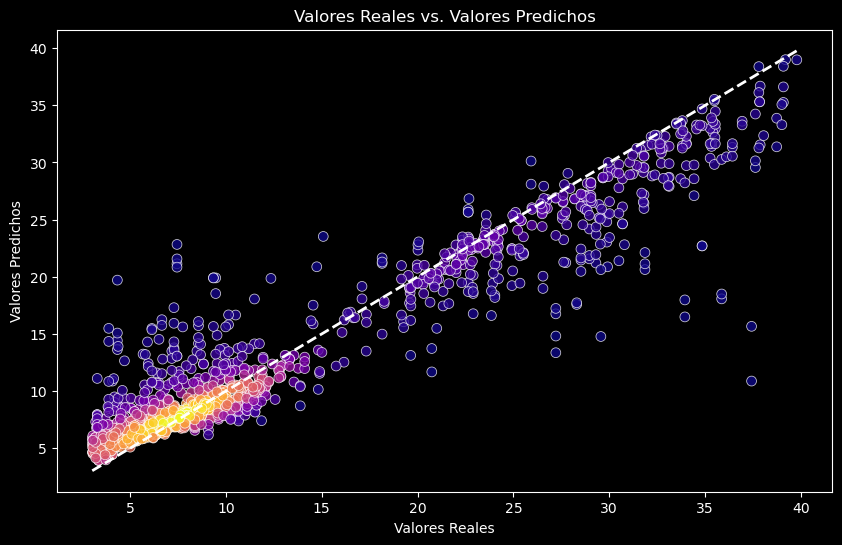

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

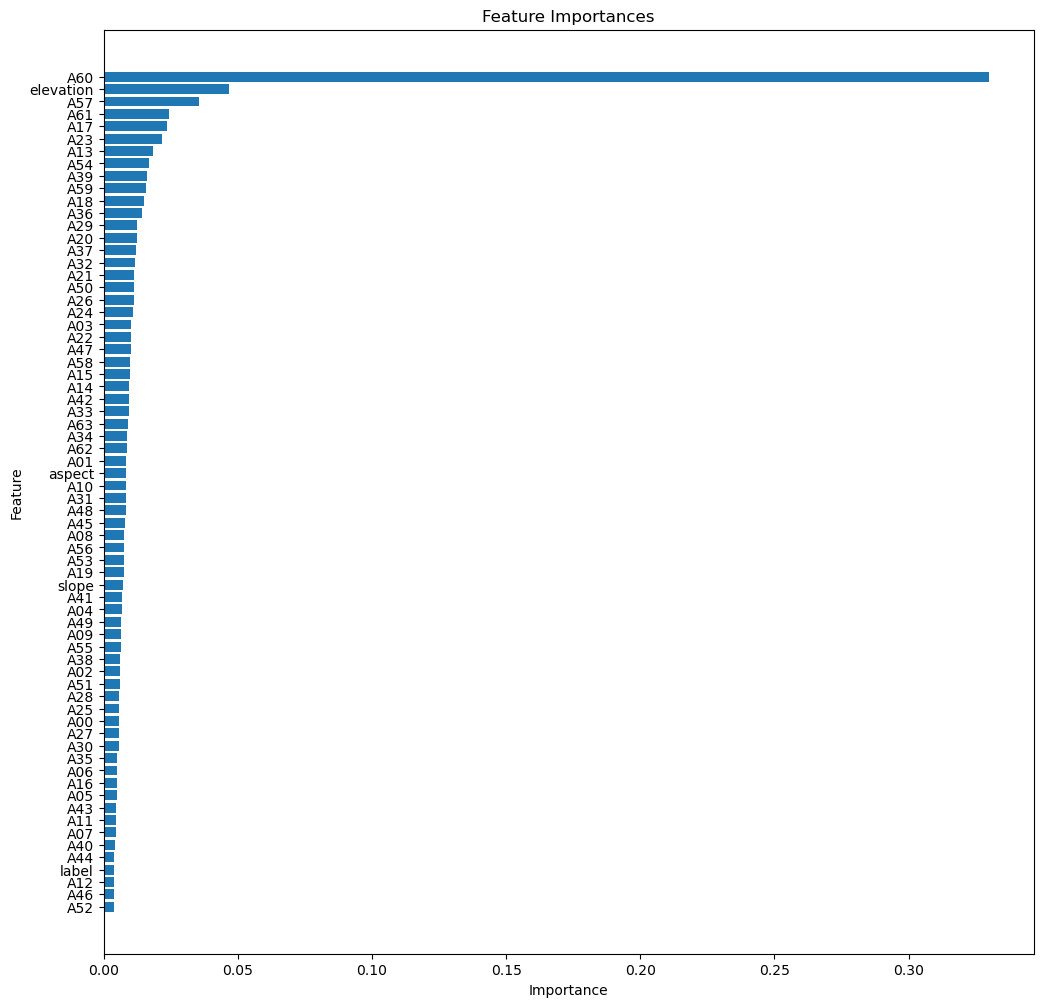

In [29]:
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

plt.figure(figsize=(12, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

band_list = ['A20','A14','A48','A36','A04','A29','A38','A40','elevation','aspect', 'slope']

In [30]:
band_list = ['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'aspect', 'elevation', 'label', 'slope']


trees = ml.rf_to_strings(rf, band_list, output_mode='regression')

In [21]:
import sys

total_bytes = sys.getsizeof(trees) + sum(sys.getsizeof(s) for s in trees)
print(f"Total en bytes: {total_bytes:,}")
print(f"En MB: {total_bytes / (1024**2):.2f} MB")


Total en bytes: 37,966,915
En MB: 36.21 MB


In [22]:
# create a ee classifier to use with ee objects from the trees
# ee_classifier = ml.strings_to_classifier(trees)

In [31]:
# this function also works with the ensemble.ExtraTrees estimator
# trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/DELTA-CHM_rh95"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [23]:
feature_names = ['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'aspect', 'elevation', 'label', 'slope']


def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=7):
    trees = ml.rf_to_strings(model, feature_names, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_CHM-uruguay"
export_model_in_parts(rf, feature_names, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_9
Parte 10 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_10
Parte 11 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_11
Parte 12 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_12
Parte 13 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_13
Parte 14 exportada a users/facuboladerasgee/Rf_CHM-uruguay_part_14


In [65]:
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Función para entrenar modelos utilizando bootstrap
def bootstrap_models(X_train, y_train, X_test, y_test, n_models=10, random_state=42):

    models = []
    r2_scores = []

    for i in range(n_models):
        # Crear una muestra bootstrap del conjunto de entrenamiento
        X_train_bootstrap, y_train_bootstrap = resample(
            X_train, y_train, replace=True, n_samples=len(y_train), random_state=random_state + i
        )
        
        # Entrenar el modelo en la muestra bootstrap
        model = RandomForestRegressor(
            bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2,
            n_estimators=100, random_state=random_state + i
        )
        model.fit(X_train_bootstrap, y_train_bootstrap)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        models.append(model)
        
        print(f"Modelo {i+1} entrenado con muestra bootstrap. R²: {r2:.4f}")
    
    return models, r2_scores

# Función para convertir y subir los modelos a GEE
def upload_models_to_gee(models, feature_names_reduced, user_id, base_asset_name="Rf_Bootstrap_Betroka_"):
    """
    Convierte cada modelo en la lista 'models' a formato de string compatible con GEE y sube cada uno como un asset.
    
    Args:
        models: Lista de modelos entrenados.
        feature_names_reduced: Lista de nombres de las características usadas en el modelo.
        user_id: ID del usuario de GEE (ej. 'users/tu_usuario').
        base_asset_name: Prefijo del nombre de los assets a subir en GEE.
    """
    for i, model in enumerate(models):
        # Convertir el modelo a cadenas
        trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
        
        # Especificar el ID del asset para este modelo
        asset_id = f"{user_id}/{base_asset_name}_model_{i+1}"
        
        # Iniciar el proceso de exportación para cada modelo
        ml.export_trees_to_fc(trees, asset_id)
        print(f"Modelo {i+1} subido a GEE con asset_id: {asset_id}")


# Lista de características reducidas (modifica si es necesario)
feature_names_reduced = [
    "EVI",
    "SR_B4",
    "slope",
    "elevation",
    "HH_minus_HV",
    "SR_B3",
    "aspect",
    "SR_B6",
    "HH_dB_Correlation",
    "HV_dB_Correlation",
    "HH_dB_Entropy",
    "SR_B2",
    "MNDWI",
    "NDBI",
    "HV_dB",   
]


# Entrenar los modelos utilizando la función bootstrap_models
models, r2_scores = bootstrap_models(X_train, y_train, X_test, y_test, n_models=10)

# ID de usuario en GEE
user_id = 'users/facuboladerasgee'  # Cambia a tu usuario de GEE
# Llamar a la función para subir los modelos
upload_models_to_gee(models, feature_names_reduced, user_id)

Modelo 1 entrenado con muestra bootstrap. R²: 0.5689
Modelo 2 entrenado con muestra bootstrap. R²: 0.5701
Modelo 3 entrenado con muestra bootstrap. R²: 0.5594
Modelo 4 entrenado con muestra bootstrap. R²: 0.5550
Modelo 5 entrenado con muestra bootstrap. R²: 0.5625
Modelo 6 entrenado con muestra bootstrap. R²: 0.5776
Modelo 7 entrenado con muestra bootstrap. R²: 0.5629
Modelo 8 entrenado con muestra bootstrap. R²: 0.5821
Modelo 9 entrenado con muestra bootstrap. R²: 0.5812
Modelo 10 entrenado con muestra bootstrap. R²: 0.5564
Modelo 1 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_1
Modelo 2 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_2
Modelo 3 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_3
Modelo 4 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_4
Modelo 5 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_Betroka__model_5
Modelo 6 subido a GEE co